In [2]:
# 기본적인 import들
# 이후 그래프 그리는 코드에는 중복으로 적지 않음.
# 다른 곳으로 그래프 그리는 코드를 복사-붙이기 할 때는 
# 이 import 코드와 함께 복사-붙이기 해야함
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm
import sympy

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

In [3]:
def plot_boundary(X, model, ax):
    # meshgrid를 짜서 Model에 포워드 시키기
    # 뉴럴 네트웍 모델 자체가 함수이므로 (x,y)->z를 하는 것이다.
    x = np.linspace(min(X[:,0]), max(X[:,0]))
    y = np.linspace(min(X[:,1]), max(X[:,1]))
    
    xx, yy = np.meshgrid(x, y)
    grid_tensor = torch.Tensor(np.c_[xx.flatten(), yy.flatten()])
    zz = model.forward(grid_tensor).detach().numpy().reshape(xx.shape)
    ax.contour(xx, yy, zz, cmap='gray', levels=[0.5])

def logistic(x):
    return 1 / (1+np.exp(-x))

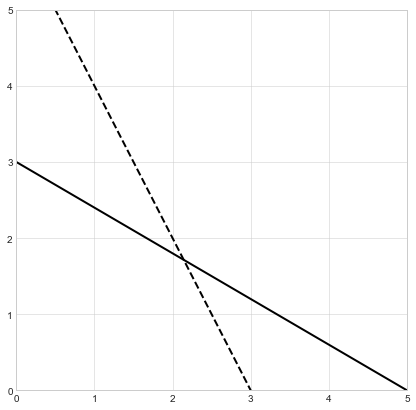

In [4]:
dcs_bnd_1 = lambda x: -(3/5)*x + 3
dcs_bnd_1_imp = lambda x, y: (3)*x + (5)*y + (-15)

dcs_bnd_2 = lambda x: -2*x + 6
dcs_bnd_2_imp = lambda x, y: (-6)*x + (-3)*y + (18)

x = np.linspace(0, 5, 50)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, dcs_bnd_1(x), color='k')
ax.plot(x, dcs_bnd_2(x), '--', color='k')

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

plt.show()

In [5]:
np.random.seed(3)

# 0~5에서 무작위 점 500개 추출
N = 500
samples = (np.random.rand(N*2)*5).reshape(N,2)

In [6]:
samples.shape

(500, 2)

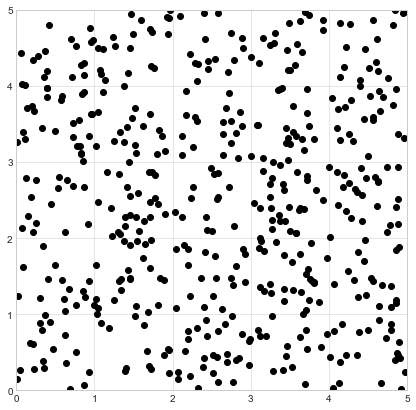

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(samples[:,0], samples[:,1], 'o', color='k')
ax.set_ylim(0, 5)
ax.set_xlim(0, 5)

plt.show()

In [8]:
y1_bin = dcs_bnd_1_imp(samples[:,0], samples[:,1]) > 0
y2_bin = dcs_bnd_2_imp(samples[:,0], samples[:,1]) < 0

In [9]:
positive_where = np.where((y1_bin | y2_bin))[0]
target = np.zeros(N)
target[positive_where] = 1

print(target.shape)

(500,)


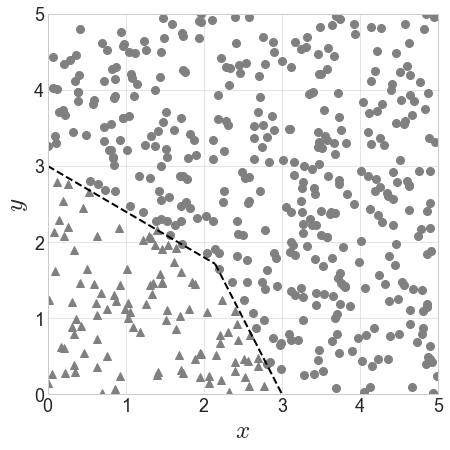

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel('$x$', fontsize=25)
ax.set_ylabel('$y$', fontsize=25)

ax.plot(samples[np.where(target==1)[0],0], samples[np.where(target==1)[0],1], 'o', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)
ax.plot(samples[np.where(target==0)[0],0], samples[np.where(target==0)[0],1], '^', 
        markerfacecolor='gray', markeredgecolor='gray', markersize=8)

x1 = np.linspace(0, 15/7, 50)
x2 = np.linspace(15/7, 3, 50)

ax.plot(x1, dcs_bnd_1(x1), '--', color='k')
ax.plot(x2, dcs_bnd_2(x2), '--', color='k')

ax.set_ylim(0,5)
ax.set_xlim(0,5)

if file_print == True :
    fig.savefig("imgs/chap9/fig9-1.png", dpi=300, bbox_inches='tight')
    fig.savefig("imgs/chap9/fig9-1.pdf", format='pdf', bbox_inches='tight')
    
plt.show()

In [15]:
xy=samples.copy()


In [16]:
xy

array([[2.7540e+00, 3.5407e+00],
       [1.4545e+00, 2.5541e+00],
       [4.4647e+00, 4.4815e+00],
       [6.2793e-01, 1.0362e+00],
       [2.5734e-01, 2.2040e+00],
       [1.4938e-01, 2.2842e+00],
       [3.2457e+00, 1.3924e+00],
       [3.3813e+00, 2.9543e+00],
       [1.1991e-01, 2.7943e+00],
       [1.2963e+00, 2.0755e+00],
       [1.4176e+00, 3.4657e+00],
       [2.2023e+00, 7.8434e-01],
       [2.7232e+00, 3.9016e+00],
       [1.5318e+00, 1.1098e+00],
       [1.9399e+00, 4.6819e+00],
       [4.8800e+00, 3.3619e+00],
       [4.5142e+00, 4.2288e+00],
       [1.8900e+00, 4.6109e-01],
       [3.2671e+00, 2.7892e+00],
       [1.8078e+00, 1.1253e+00],
       [2.0326e+00, 2.3447e+00],
       [1.3462e+00, 1.4590e+00],
       [2.2884e+00, 4.3027e+00],
       [2.9313e+00, 1.4174e+00],
       [1.3899e+00, 2.2731e+00],
       [1.0271e+00, 1.0069e+00],
       [2.5702e+00, 4.3615e-01],
       [2.4179e+00, 1.8109e+00],
       [3.5384e+00, 3.7337e+00],
       [3.4555e+00, 3.4459e+00],
       [1.

In [17]:
W=np.array([[-15,3,5],[18,6,-3],[4,10,-9]])

xy=np.hstack( (np.ones(samples.shape[0]).reshape(-1,1), xy) )
xy

array([[1.    , 2.754 , 3.5407],
       [1.    , 1.4545, 2.5541],
       [1.    , 4.4647, 4.4815],
       ...,
       [1.    , 0.6119, 1.2026],
       [1.    , 2.9004, 1.8535],
       [1.    , 0.1758, 0.6235]])

In [19]:
Z1=np.dot(W[:2,:],xy.T)
Z1

array([[ 1.0966e+01,  2.1343e+00,  2.0802e+01, -7.9351e+00, -3.2077e+00, -3.1310e+00,  1.6993e+00,  9.9154e+00, -6.6892e-01, -7.3368e-01,
         6.5813e+00, -4.4715e+00,  1.2678e+01, -4.8556e+00,  1.4229e+01,  1.6450e+01,  1.9686e+01, -7.0247e+00,  8.7472e+00, -3.9502e+00,
         2.8213e+00, -3.6666e+00,  1.3379e+01,  8.8099e-01,  5.3521e-01, -6.8844e+00, -5.1087e+00,  1.3082e+00,  1.4284e+01,  1.2596e+01,
         7.3074e+00,  4.4176e+00,  1.0157e+00, -8.0102e+00,  5.3386e+00,  1.1634e+01,  7.7363e+00, -4.3758e+00, -8.9372e+00, -1.0219e+01,
         7.7135e-01,  1.1620e+01,  8.7497e+00,  2.2049e+00,  1.9881e+01,  7.9008e+00,  1.6250e+01,  1.7754e+01,  3.6535e+00, -1.7978e+00,
         6.0228e+00,  2.1077e+01,  1.1354e+01, -1.4313e+00,  1.8610e+01,  3.6584e+00, -7.2999e+00,  8.4142e+00, -1.8140e+00, -7.5604e+00,
         6.4083e+00,  6.7413e+00,  5.4273e+00,  1.0235e+01, -1.2505e+01,  1.0236e+01,  1.4048e+01, -5.9409e+00,  1.7769e+01, -8.2728e+00,
         5.2336e+00,  6.7077e-02, 

In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [21]:
A1=sigmoid(Z1)

In [22]:
A1

array([[9.9998e-01, 8.9419e-01, 1.0000e+00, 3.5781e-04, 3.8875e-02, 4.1845e-02, 8.4545e-01, 9.9995e-01, 3.3874e-01, 3.2439e-01, 9.9862e-01,
        1.1301e-02, 1.0000e+00, 7.7245e-03, 1.0000e+00, 1.0000e+00, 1.0000e+00, 8.8888e-04, 9.9984e-01, 1.8888e-02, 9.4382e-01, 2.4925e-02,
        1.0000e+00, 7.0703e-01, 6.3070e-01, 1.0226e-03, 6.0074e-03, 7.8721e-01, 1.0000e+00, 1.0000e+00, 9.9933e-01, 9.8808e-01, 7.3414e-01,
        3.3195e-04, 9.9522e-01, 9.9999e-01, 9.9956e-01, 1.2422e-02, 1.3140e-04, 3.6452e-05, 6.8381e-01, 9.9999e-01, 9.9984e-01, 9.0069e-01,
        1.0000e+00, 9.9963e-01, 1.0000e+00, 1.0000e+00, 9.7475e-01, 1.4212e-01, 9.9758e-01, 1.0000e+00, 9.9999e-01, 1.9290e-01, 1.0000e+00,
        9.7487e-01, 6.7516e-04, 9.9978e-01, 1.4015e-01, 5.2041e-04, 9.9835e-01, 9.9882e-01, 9.9562e-01, 9.9996e-01, 3.7091e-06, 9.9996e-01,
        1.0000e+00, 2.6228e-03, 1.0000e+00, 2.5529e-04, 9.9469e-01, 5.1676e-01, 1.0000e+00, 9.9250e-01, 3.5138e-01, 5.4906e-01, 8.8097e-01,
        1.0000e+00, 

In [32]:
A1.shape
A1

array([[9.9998e-01, 8.9419e-01, 1.0000e+00, 3.5781e-04, 3.8875e-02, 4.1845e-02, 8.4545e-01, 9.9995e-01, 3.3874e-01, 3.2439e-01, 9.9862e-01,
        1.1301e-02, 1.0000e+00, 7.7245e-03, 1.0000e+00, 1.0000e+00, 1.0000e+00, 8.8888e-04, 9.9984e-01, 1.8888e-02, 9.4382e-01, 2.4925e-02,
        1.0000e+00, 7.0703e-01, 6.3070e-01, 1.0226e-03, 6.0074e-03, 7.8721e-01, 1.0000e+00, 1.0000e+00, 9.9933e-01, 9.8808e-01, 7.3414e-01,
        3.3195e-04, 9.9522e-01, 9.9999e-01, 9.9956e-01, 1.2422e-02, 1.3140e-04, 3.6452e-05, 6.8381e-01, 9.9999e-01, 9.9984e-01, 9.0069e-01,
        1.0000e+00, 9.9963e-01, 1.0000e+00, 1.0000e+00, 9.7475e-01, 1.4212e-01, 9.9758e-01, 1.0000e+00, 9.9999e-01, 1.9290e-01, 1.0000e+00,
        9.7487e-01, 6.7516e-04, 9.9978e-01, 1.4015e-01, 5.2041e-04, 9.9835e-01, 9.9882e-01, 9.9562e-01, 9.9996e-01, 3.7091e-06, 9.9996e-01,
        1.0000e+00, 2.6228e-03, 1.0000e+00, 2.5529e-04, 9.9469e-01, 5.1676e-01, 1.0000e+00, 9.9250e-01, 3.5138e-01, 5.4906e-01, 8.8097e-01,
        1.0000e+00, 

In [24]:
A1_=np.vstack((np.ones(A1.shape[1]),A1))
A1_

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00, 1.0000e+00],
       [9.9998e-01, 8.9419e-01, 1.0000e+00, ..., 7.8320e-04, 9.5114e-01, 1.1709e-05],
       [1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 1.0000e+00, 1.0000e+00, 1.0000e+00]])

In [25]:
A1.shape

(2, 500)

In [26]:
A1_.shape

(3, 500)

In [27]:
ww=W[-1,:]
ww

array([ 4, 10, -9])

In [28]:
ww.shape

(3,)

In [29]:
Z1.shape

(2, 500)

In [30]:
W_=W[:2,:]
W_

array([[-15,   3,   5],
       [ 18,   6,  -3]])

In [31]:
W_.shape

(2, 3)

In [34]:
xt=np.array([[1,2],[3,4],[5,6]])
xt=np.hstack( (np.ones(xt.shape[0]).reshape(-1,1), xt) )

az1=np.dot(W[:2,:],xt.T)
az1

array([[-2., 14., 30.],
       [18., 24., 30.]])

In [35]:
xt

array([[1., 1., 2.],
       [1., 3., 4.],
       [1., 5., 6.]])

In [36]:
W[:2,:]

array([[-15,   3,   5],
       [ 18,   6,  -3]])

In [37]:
xt.T

array([[1., 1., 1.],
       [1., 3., 5.],
       [2., 4., 6.]])

In [38]:
az1

array([[-2., 14., 30.],
       [18., 24., 30.]])

In [39]:
At1=sigmoid(az1)
At1

array([[0.1192, 1.    , 1.    ],
       [1.    , 1.    , 1.    ]])

In [40]:
At1=np.vstack((np.ones(At1.shape[1]),At1))
At1

array([[1.    , 1.    , 1.    ],
       [0.1192, 1.    , 1.    ],
       [1.    , 1.    , 1.    ]])

In [42]:
Zt=np.dot(W[-1,:],At1)
Zt

array([-3.808,  5.   ,  5.   ])

In [43]:
At1.shape

(3, 3)

In [44]:
Zt.shpae

AttributeError: 'numpy.ndarray' object has no attribute 'shpae'

In [45]:
Zt.shape

(3,)